In [106]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [107]:
path = os.getcwd() + "/data/ex1data1.txt"
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])  
data.head()  
data.describe() 

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


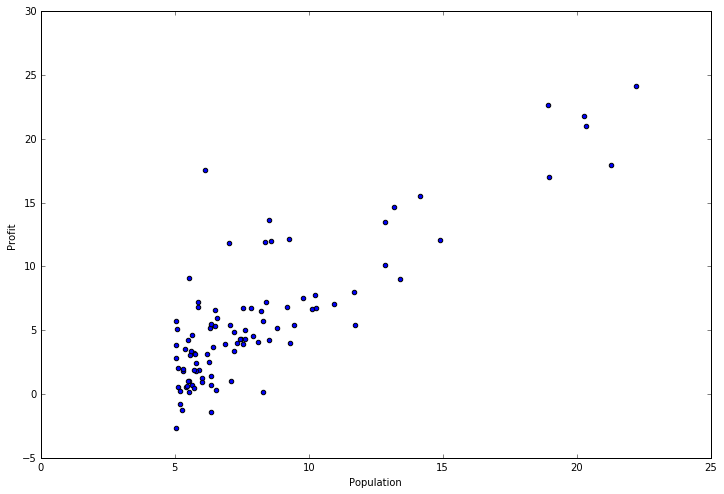

In [108]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8)) 

In [109]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T)-y), 2)
    return np.sum(inner)/(2*len(X))

# append a ones column to the front of the data set
data.insert(0, 'Ones', 1)
data.describe()


,Ones,Population,Profit
count,97.0,97.000000,97.000000
mean,1.0,8.159800,5.839135
std,0.0,3.869884,5.510262
min,1.0,5.026900,-2.680700
25%,1.0,5.707700,1.986900
50%,1.0,6.589400,4.562300
75%,1.0,8.578100,7.046700
max,1.0,22.203000,24.147000


In [110]:
# set X (training data) and y (target variable)
cols = data.shape[1]  
X = data.iloc[:,0:cols-1]  
y = data.iloc[:,cols-1:cols] 

# convert from data frames to numpy matrices
X = np.matrix(X.values)  
y = np.matrix(y.values)  
theta = np.matrix(np.array([0,0]))  

X.shape, theta.shape, y.shape  

((97, 2), (1, 2), (97, 1))

In [111]:
#compute cost while parameters are still initialized to zero
computeCost(X, y, theta)  

32.072733877455676

In [112]:
def gradientDescent (X, y, theta, alpha, iters):
    # set up initial params
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
        
        #update theta after entire matrix is calculated and calculate new cost
        theta = temp
        cost[i] = computeCost(X, y, theta)
    return theta, cost

# initialize variables foe alpha - learning rate, and iterations
alpha = 0.01
iters = 1000

# perform gradient descent to fit the model
g, cost = gradientDescent(X, y, theta, alpha, iters)
g
    

matrix([[-3.24140214,  1.1272942 ]])

In [113]:
computeCost(X, y, g)

4.5159555030789118

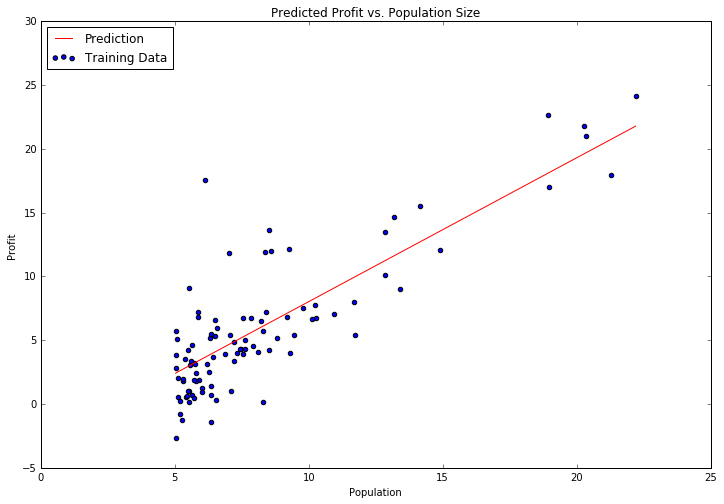

In [114]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0,0] + (g[0,1] * x)

fig, ax = plt.subplots(figsize = (12,8))
ax.plot(x,f,'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label = 'Training Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

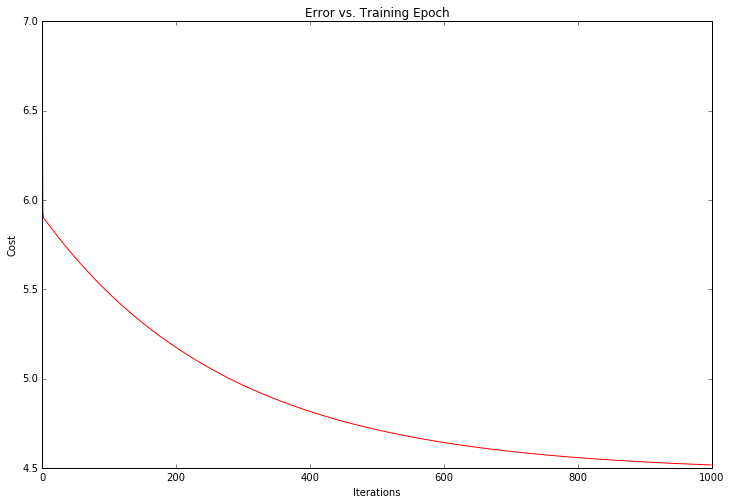

In [115]:
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  

In [116]:
# TWO D EXAMPLE!!!
path = os.getcwd() + '/data/ex1data2.txt'  
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])  
data2.head() 

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [117]:
# feature normalization to reduce the influence of offset data weights
data2 = (data2 - data2.mean()) / data2.std()  
data2.head() 

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [118]:
# convert to usable matrices

# add a one's column to the dataset for y-intercept
data2.insert(0, 'Ones', 1)

#set the X training data and y target data
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

# convert to matrices
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

In [119]:
# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

# get the cost (error) of the model
computeCost(X2, y2, g2)  

0.13070336960771892

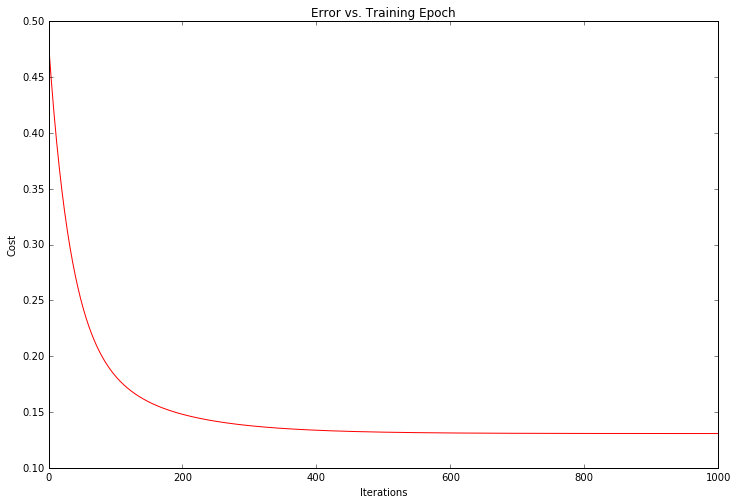

In [120]:
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(np.arange(iters), cost2, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch') 

In [127]:
from sklearn import linear_model  
model = linear_model.LinearRegression()  
model.fit(X, y)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

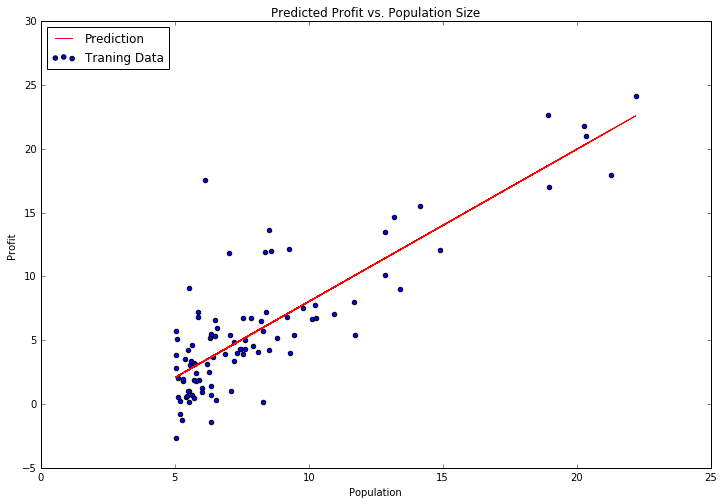

In [128]:
x = np.array(X[:, 1].A1)  
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(x, f, 'r', label='Prediction')  
ax.scatter(data.Population, data.Profit, label='Traning Data')  
ax.legend(loc=2)  
ax.set_xlabel('Population')  
ax.set_ylabel('Profit')  
ax.set_title('Predicted Profit vs. Population Size')   